In [2]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [3]:
name = 'IOY.VI'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-03-15",end="2022-09-10")
x = df['Close']

In [4]:
returns = x.pct_change(1).dropna()

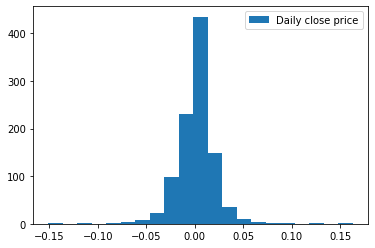

In [5]:
plt.hist(returns,bins="rice",label="Daily close price")
plt.legend()
plt.show()

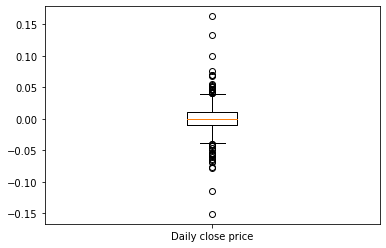

In [6]:
plt.boxplot(returns,labels=["Daily close price"])
plt.show()

In [7]:
np.mean(returns)

0.0010862486709505167

In [8]:
np.std(returns)

0.02023449525189234

In [9]:
np.quantile(returns, 0.5)

0.0

In [10]:
skew(returns)

0.1419133112174966

In [11]:
skewtest(returns)

SkewtestResult(statistic=1.8393367112004948, pvalue=0.0658656765922248)

In [12]:
kurtosis(returns)

10.938270756031761

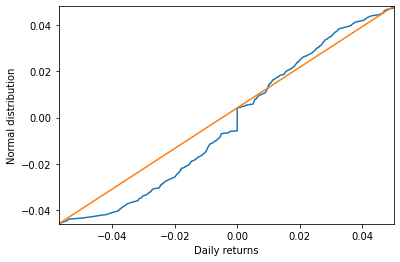

In [13]:
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

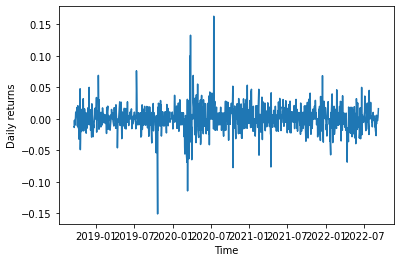

In [14]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

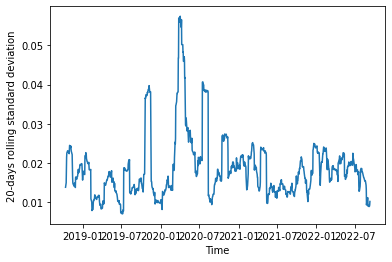

In [15]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


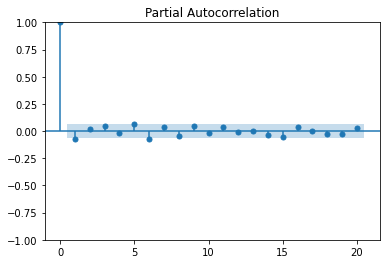

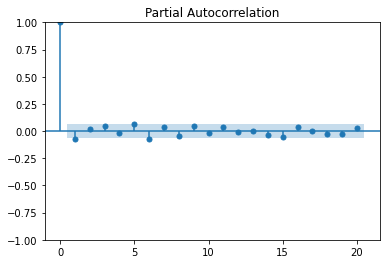

In [16]:
plot_pacf(returns,lags=20)

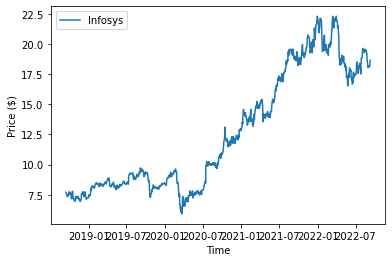

In [18]:
plt.plot(x,label="Infosys")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()